<div style="text-align: center; font-size: 30px; font-weight: bold;"> 
Movement Intention Prediction
<br> -------------- <br> 
Riemann MLP 
<br> -------------- <br>
Grid Search
</div>

## Introduction

This notebook aims to gather the results of the grid search for the best hyperparameters for the models used in the `RIEMANN MLP` movement intention prediction pipeline. The hyperparameters search has been performed on the ISAE Supaero's HPC cluster. All the training environnment and script can be found in the `src/training/RIEMANN_MLP_MVT_INT_grid_search/`. The results for each grid search are stored in the `results/` folder next to this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
# Names and paths
RESULT_PATH = './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/'
NAME_RESULTS = 'RMLP_MVT_INT_search_preproc'
SAVE_PATH = './results/'
NAME_SAVE = 'RMLP_MVT_INT_search_preproc'

In [9]:
# Gather results
def gather_results(path, name, save_path, name_save, verbose=False):
    files = [f for f in os.listdir(path) if f.startswith(name) and f.endswith('.csv')]
    files = [os.path.join(path, f) for f in files]
    dfs = []
    if verbose:
        print(f'Gathering {len(files)} files')
        print(f'files: {files}')
    for file in files:
        df = pd.read_csv(file)
        dfs.append(df)
        if verbose:
            print(f'File {file} has shape {df.shape}')
    result_df = pd.concat(dfs, ignore_index=True)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    result_df.to_csv(os.path.join(save_path, name_save + '.csv'), index=False)
    return result_df

In [10]:
# Load results
def boxplot_results(result_df, parameters, scores=['score_A', 'score_B', 'score_C', 'score_X']):
    fig, ax = plt.subplots(len(scores), len(parameters), figsize=(15, 20))
    fig.suptitle('Hyperparameter tuning')

    for i, score in enumerate(scores):
        for j, param in enumerate(parameters):
            sns.boxplot(x=param, y=score, data=result_df, ax=ax[i, j])
            ax[i, j].set_title(score + ' ' + param)

    plt.tight_layout()
    plt.show()

In [11]:
def maxplot_results(result_df, parameters):
    """
    Plot the max score for each parameter
    
    Parameters
    ----------
    result_df: dataframe with the results
    parameters: list of parameters to plot (columns of result_df)
    """
    for p in parameters:
        max_score_A = result_df.groupby(p)['score_A'].max()
        max_score_B = result_df.groupby(p)['score_B'].max()
        max_score_C = result_df.groupby(p)['score_C'].max()
        max_score_X = result_df.groupby(p)['score_X'].max()

        max_score_A = max_score_A.reset_index()
        max_score_B = max_score_B.reset_index()
        max_score_C = max_score_C.reset_index()
        max_score_X = max_score_X.reset_index()

        fig, ax = plt.subplots(2, 2, figsize=(15, 10))
        ax[0, 0].scatter(max_score_A[p], max_score_A['score_A'], label='score_A', marker='o')
        ax[0, 0].set_xlabel(p)
        ax[0, 0].set_ylabel('score_A')
        ax[0, 0].set_title('score_A')
        ax[0, 0].legend()

        ax[0, 1].scatter(max_score_B[p], max_score_B['score_B'], label='score_B', marker='o')
        ax[0, 1].set_xlabel(p)
        ax[0, 1].set_ylabel('score_B')
        ax[0, 1].set_title('score_B')
        ax[0, 1].legend()

        ax[1, 0].scatter(max_score_C[p], max_score_C['score_C'], label='score_C', marker='o')
        ax[1, 0].set_xlabel(p)
        ax[1, 0].set_ylabel('score_C')
        ax[1, 0].set_title('score_C')
        ax[1, 0].legend()

        ax[1, 1].scatter(max_score_X[p], max_score_X['score_X'], label='score_X', marker='o')
        ax[1, 1].set_xlabel(p)
        ax[1, 1].set_ylabel('score_X')
        ax[1, 1].set_title('score_X')
        ax[1, 1].legend()
        plt.tight_layout()
        plt.show()

In [37]:
def maxplot_all_results(result_df, param, figsize=(15, 10), mean_ABC=False):
    fig, ax = plt.subplots(1, len(param), figsize=figsize)
    result_df['mean_ABC'] = result_df[['score_A', 'score_B', 'score_C']].mean(axis=1)

    for p in param:
        max_score_A = result_df.groupby(p)['score_A'].max()
        max_score_B = result_df.groupby(p)['score_B'].max()
        max_score_C = result_df.groupby(p)['score_C'].max()
        max_score_X = result_df.groupby(p)['score_X'].max()
        if mean_ABC:
            max_score_ABC = result_df.groupby(p)['mean_ABC'].max()
            max_score_ABC = max_score_ABC.reset_index()

        max_score_A = max_score_A.reset_index()
        max_score_B = max_score_B.reset_index()
        max_score_C = max_score_C.reset_index()
        max_score_X = max_score_X.reset_index()
        
        if len(param) == 1:
            ax.plot(max_score_A[p], max_score_A['score_A'], label='score_A', marker='o')
            ax.plot(max_score_B[p], max_score_B['score_B'], label='score_B', marker='^')
            ax.plot(max_score_C[p], max_score_C['score_C'], label='score_C', marker='s')
            ax.plot(max_score_C[p], max_score_X['score_X'], label='score_X', marker='.')
            if mean_ABC:
                ax.plot(max_score_ABC[p], max_score_ABC['mean_ABC'], label='mean_ABC', marker='x')
            ax.set_title(p)
        else:
            ax[param.index(p)].plot(max_score_A[p], max_score_A['score_A'], label='score_A', marker='o')
            ax[param.index(p)].plot(max_score_B[p], max_score_B['score_B'], label='score_B', marker='^')
            ax[param.index(p)].plot(max_score_C[p], max_score_C['score_C'], label='score_C', marker='s')
            ax[param.index(p)].plot(max_score_C[p], max_score_X['score_X'], label='score_X', marker='.')
            if mean_ABC:
                ax[param.index(p)].plot(max_score_ABC[p], max_score_ABC['mean_ABC'], label='mean_ABC', marker='x')
            ax[param.index(p)].set_title(p)

    plt.legend()
    plt.show()



In [47]:
def rebase_results(result_df):
    result_df['pipeline_name'] = result_df['pipeline'].apply(lambda x: x.split("steps=[('")[1].split("'")[0])
    result_df['model'] = result_df['pipeline'].apply(lambda x: x.split("clf',")[1].split("()")[0])
    result_df.loc[result_df['pipeline_name'] == 'cov', 'pipeline_name'] = 'riemann'
    result_df.loc[result_df['pipeline_name'] == 'fd', 'pipeline_name'] = 'MLP'
    result_df.loc[result_df['model'] == 'LogisticRegression', 'model'] = 'LR'
    result_df.loc[result_df['model'] == 'RandomForestClassifier', 'model'] = 'RandForest'
    result_df.loc[result_df['model'] == 'AdaBoostClassifier', 'model'] = 'AdaBoost'
    result_df.loc[result_df['model'] == 'LinearDiscriminantAnalysis', 'model'] = 'LDA'
    result_df['model'] = result_df['model'].apply(lambda x: 'MLP' if 'MLP' in x else x)
    result_df['pipeline_step_1'] = result_df['pipeline'].apply(lambda x: x.split("steps=[('")[1].split("'")[0])
    result_df['pipeline_step_2'] = result_df['pipeline'].apply(lambda x: x.split("('")[2].split("'")[0] if len(x.split("('")) > 2 and x.split("('")[2].split("'")[0] != 'clf' else 'no_step')
    result_df['pipeline_step_3'] = result_df['pipeline'].apply(lambda x: x.split("('")[3].split("'")[0] if len(x.split("('")) > 3 and x.split("('")[3].split("'")[0] != 'clf' else 'no_step')
    result_df['pipeline_name'] = result_df['pipeline_step_1'] + '_' + result_df['pipeline_step_2'] + '_' + result_df['pipeline_step_3']
    result_df['pipeline_name'] = result_df['pipeline_name'].apply(lambda x: x.replace('_no_step', ''))
    result_df[['pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'pipeline_name']]
    result_df['pipeline_name'] = result_df['pipeline_name'].apply(lambda x: x.replace('fd', 'vec'))
    result_df['mean_ABCX'] = result_df[['score_A', 'score_B', 'score_C', 'score_X']].mean(axis=1)
    result_df['pipeline_name'] = result_df['pipeline_name'].apply(lambda x: x.replace('_vec', ''))
    result_df['pipeline_name'] = result_df['pipeline_name'].apply(lambda x: x.replace('wavelet', 'wvlt'))
    result_df['mean_ABC'] = result_df[['score_A', 'score_B', 'score_C']].mean(axis=1)
    if 'clf__hidden_layer_sizes' in result_df.columns:
        result_df['clf__hidden_layer_sizes'] = result_df['clf__hidden_layer_sizes'].apply(lambda x: x.replace(' ', '\n'))

In [73]:
def print_preproc(result_df_v1):
    epochs_tmin = result_df_v1['EPOCHS_TMIN'].unique()
    epochs_length = result_df_v1['EPOCHS_LENGTH'].unique()
    epochs_empty_from_mvt_tmin = result_df_v1['EPOCHS_EMPTY_FROM_MVT_TMIN'].unique()
    epochs_intention_from_mvt_tmin = result_df_v1['EPOCHS_INTENTION_FROM_MVT_TMIN'].unique() if 'EPOCHS_INTENTION_FROM_MVT_TMIN' in result_df_v1.columns else None
    fmin = result_df_v1['FMIN'].unique()
    fmax = result_df_v1['FMAX'].unique()

    # print all preprocessing parameters
    print(f'epochs_tmin: {epochs_tmin}')
    print(f'epochs_length: {epochs_length}')
    print(f'epochs_empty_from_mvt_tmin: {epochs_empty_from_mvt_tmin}')
    print(f'epochs_intention_from_mvt_tmin: {epochs_intention_from_mvt_tmin}')
    print(f'fmin: {fmin}')
    print(f'fmax: {fmax}')

In [77]:
def print_pipelines_params(result_df_v1):
    pipeline_name = result_df_v1['pipeline_name'].unique()
    model = result_df_v1['model'].unique()
    pipeline_step_1 = result_df_v1['pipeline_step_1'].unique()
    pipeline_step_2 = result_df_v1['pipeline_step_2'].unique()
    pipeline_step_3 = result_df_v1['pipeline_step_3'].unique()
    
    # print all preprocessing parameters
    print(f'pipeline_name: {pipeline_name}')
    print(f'model: {model}')
    print(f'pipeline_step_1: {pipeline_step_1}')
    print(f'pipeline_step_2: {pipeline_step_2}')
    print(f'pipeline_step_3: {pipeline_step_3}')
    
    step_param = []
    for name in result_df_v1.columns:
        if '__' in name:
            step_param.append(result_df_v1[name].unique())
            print(f'{name}: {step_param[-1]}')
    

## Grid Search 1: Search architecture and activation function

### Downloading the results

In [45]:
Version = 'V1'
path = RESULT_PATH + Version + '/'
name_save = NAME_SAVE + '_' + Version
result_df_v1 = gather_results(path, NAME_RESULTS, SAVE_PATH, name_save, verbose=True)
result_df_v1['version'] = Version
rebase_results(result_df_v1)

Gathering 5 files
files: ['./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_2.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_3.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_4.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_5.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_6.csv']
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_2.csv has shape (14, 31)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_3.csv has shape (14, 31)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V1/RMLP_MVT_INT_search_preproc_V1_node_4.csv has shape (14, 31)
File ./../../src/training/RIEMANN_MLP_M

### Preprocessing parameters grid

In [75]:
print_preproc(result_df_v1)

epochs_tmin: [0]
epochs_length: [2]
epochs_empty_from_mvt_tmin: [-6]
epochs_intention_from_mvt_tmin: [-2]
fmin: [9]
fmax: [30]


### Pipeline parameters grid

In [78]:
print_pipelines_params(result_df_v1)

pipeline_name: ['cov_ts']
model: ['MLP']
pipeline_step_1: ['cov']
pipeline_step_2: ['ts']
pipeline_step_3: ['no_step']
clf__activation: ['identity' 'logistic' 'tanh' 'relu']
clf__hidden_layer_sizes: ['(100,\n100,\n100)' '(16,\n8,\n4)' '(64,\n32)' '(128,\n64,\n32,\n16)'
 '(8,\n4)' '(32,\n16,\n8)' '(64,\n32,\n16,\n8,\n4)'
 '(100,\n100,\n100,\n100)' '(16,\n8,\n4,\n2)' '(64,\n32,\n16)'
 '(128,\n64,\n32,\n16,\n8)' '(8,\n4,\n2)' '(32,\n16,\n8,\n4)' '(128,\n64)'
 '(100,\n100,\n100,\n100,\n100)' '(32,\n16)' '(64,\n32,\n16,\n8)'
 '(100,\n100)' '(16,\n8)' '(32,\n16,\n8,\n4,\n2)' '(128,\n64,\n32)']


### Max scores

In [53]:
# display all columns
pd.set_option('display.max_columns', None)
result_df_v1[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', 'clf__hidden_layer_sizes', 'clf__activation']].sort_values(by='mean_ABC', ascending=False).head(10)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__hidden_layer_sizes,clf__activation
69,cov_ts,cov,ts,no_step,MLP,0.575604,0.592187,0.588658,0.545968,0.582545,"(128,\n64,\n32,\n16,\n8)",relu
13,cov_ts,cov,ts,no_step,MLP,0.574551,0.595340,0.590895,0.537417,0.587364,"(64,\n32,\n16,\n8,\n4)",relu
55,cov_ts,cov,ts,no_step,MLP,0.572433,0.584799,0.585955,0.546544,0.587282,"(128,\n64,\n32,\n16)",relu
27,cov_ts,cov,ts,no_step,MLP,0.571803,0.592564,0.581968,0.540875,0.579662,"(128,\n64)",relu
26,cov_ts,cov,ts,no_step,MLP,0.571489,0.588839,0.580598,0.545031,0.584582,"(32,\n16,\n8,\n4)",relu
60,cov_ts,cov,ts,no_step,MLP,0.571281,0.576460,0.567982,0.569400,0.537329,"(16,\n8,\n4,\n2)",logistic
68,cov_ts,cov,ts,no_step,MLP,0.570510,0.587284,0.582031,0.542215,0.583023,"(64,\n32,\n16)",relu
66,cov_ts,cov,ts,no_step,MLP,0.570247,0.584520,0.582450,0.543771,0.584095,"(100,\n100,\n100,\n100)",relu
47,cov_ts,cov,ts,no_step,MLP,0.569146,0.585658,0.574011,0.547769,0.578719,"(64,\n32)",logistic
41,cov_ts,cov,ts,no_step,MLP,0.568467,0.583534,0.584514,0.537353,0.586497,"(128,\n64,\n32)",relu


In [81]:
result_df_v1[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', 'clf__hidden_layer_sizes', 'clf__activation']].sort_values(by='score_A', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__hidden_layer_sizes,clf__activation
13,cov_ts,cov,ts,no_step,MLP,0.574551,0.595340,0.590895,0.537417,0.587364,"(64,\n32,\n16,\n8,\n4)",relu
27,cov_ts,cov,ts,no_step,MLP,0.571803,0.592564,0.581968,0.540875,0.579662,"(128,\n64)",relu
69,cov_ts,cov,ts,no_step,MLP,0.575604,0.592187,0.588658,0.545968,0.582545,"(128,\n64,\n32,\n16,\n8)",relu


In [82]:
result_df_v1[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', 'clf__hidden_layer_sizes', 'clf__activation']].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__hidden_layer_sizes,clf__activation
13,cov_ts,cov,ts,no_step,MLP,0.574551,0.595340,0.590895,0.537417,0.587364,"(64,\n32,\n16,\n8,\n4)",relu
69,cov_ts,cov,ts,no_step,MLP,0.575604,0.592187,0.588658,0.545968,0.582545,"(128,\n64,\n32,\n16,\n8)",relu
55,cov_ts,cov,ts,no_step,MLP,0.572433,0.584799,0.585955,0.546544,0.587282,"(128,\n64,\n32,\n16)",relu


In [83]:
result_df_v1[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', 'clf__hidden_layer_sizes', 'clf__activation']].sort_values(by='score_C', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__hidden_layer_sizes,clf__activation
60,cov_ts,cov,ts,no_step,MLP,0.571281,0.576460,0.567982,0.569400,0.537329,"(16,\n8,\n4,\n2)",logistic
46,cov_ts,cov,ts,no_step,MLP,0.561960,0.564816,0.564149,0.556914,0.565450,"(16,\n8,\n4)",logistic
1,cov_ts,cov,ts,no_step,MLP,0.556903,0.554371,0.560113,0.556225,0.554534,"(16,\n8,\n4)",identity


### Plots

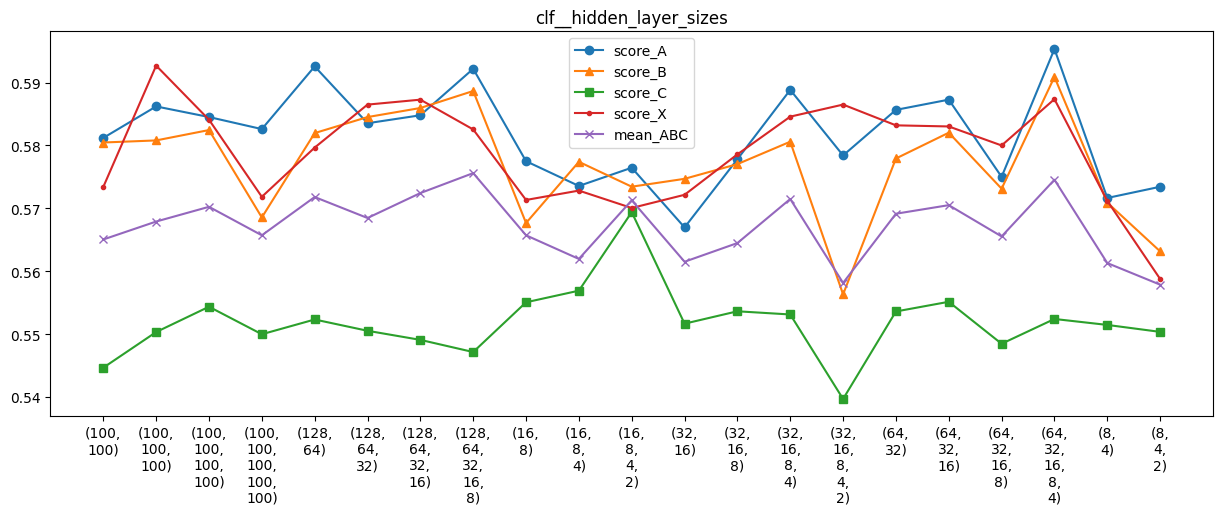

In [38]:
maxplot_all_results(result_df_v1, ['clf__hidden_layer_sizes'], figsize=(15, 5), mean_ABC=True)

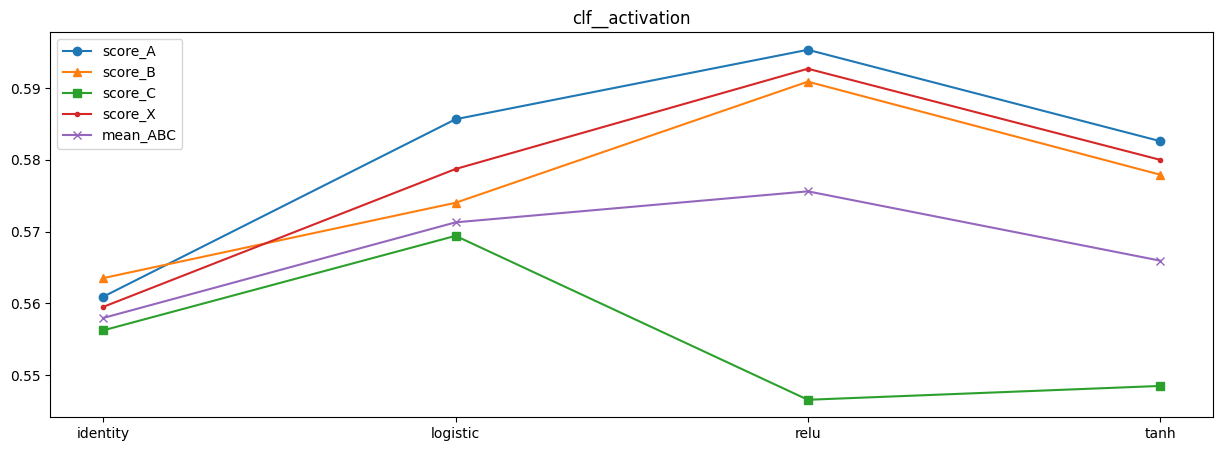

In [39]:
maxplot_all_results(result_df_v1, ['clf__activation'], figsize=(15, 5), mean_ABC=True)

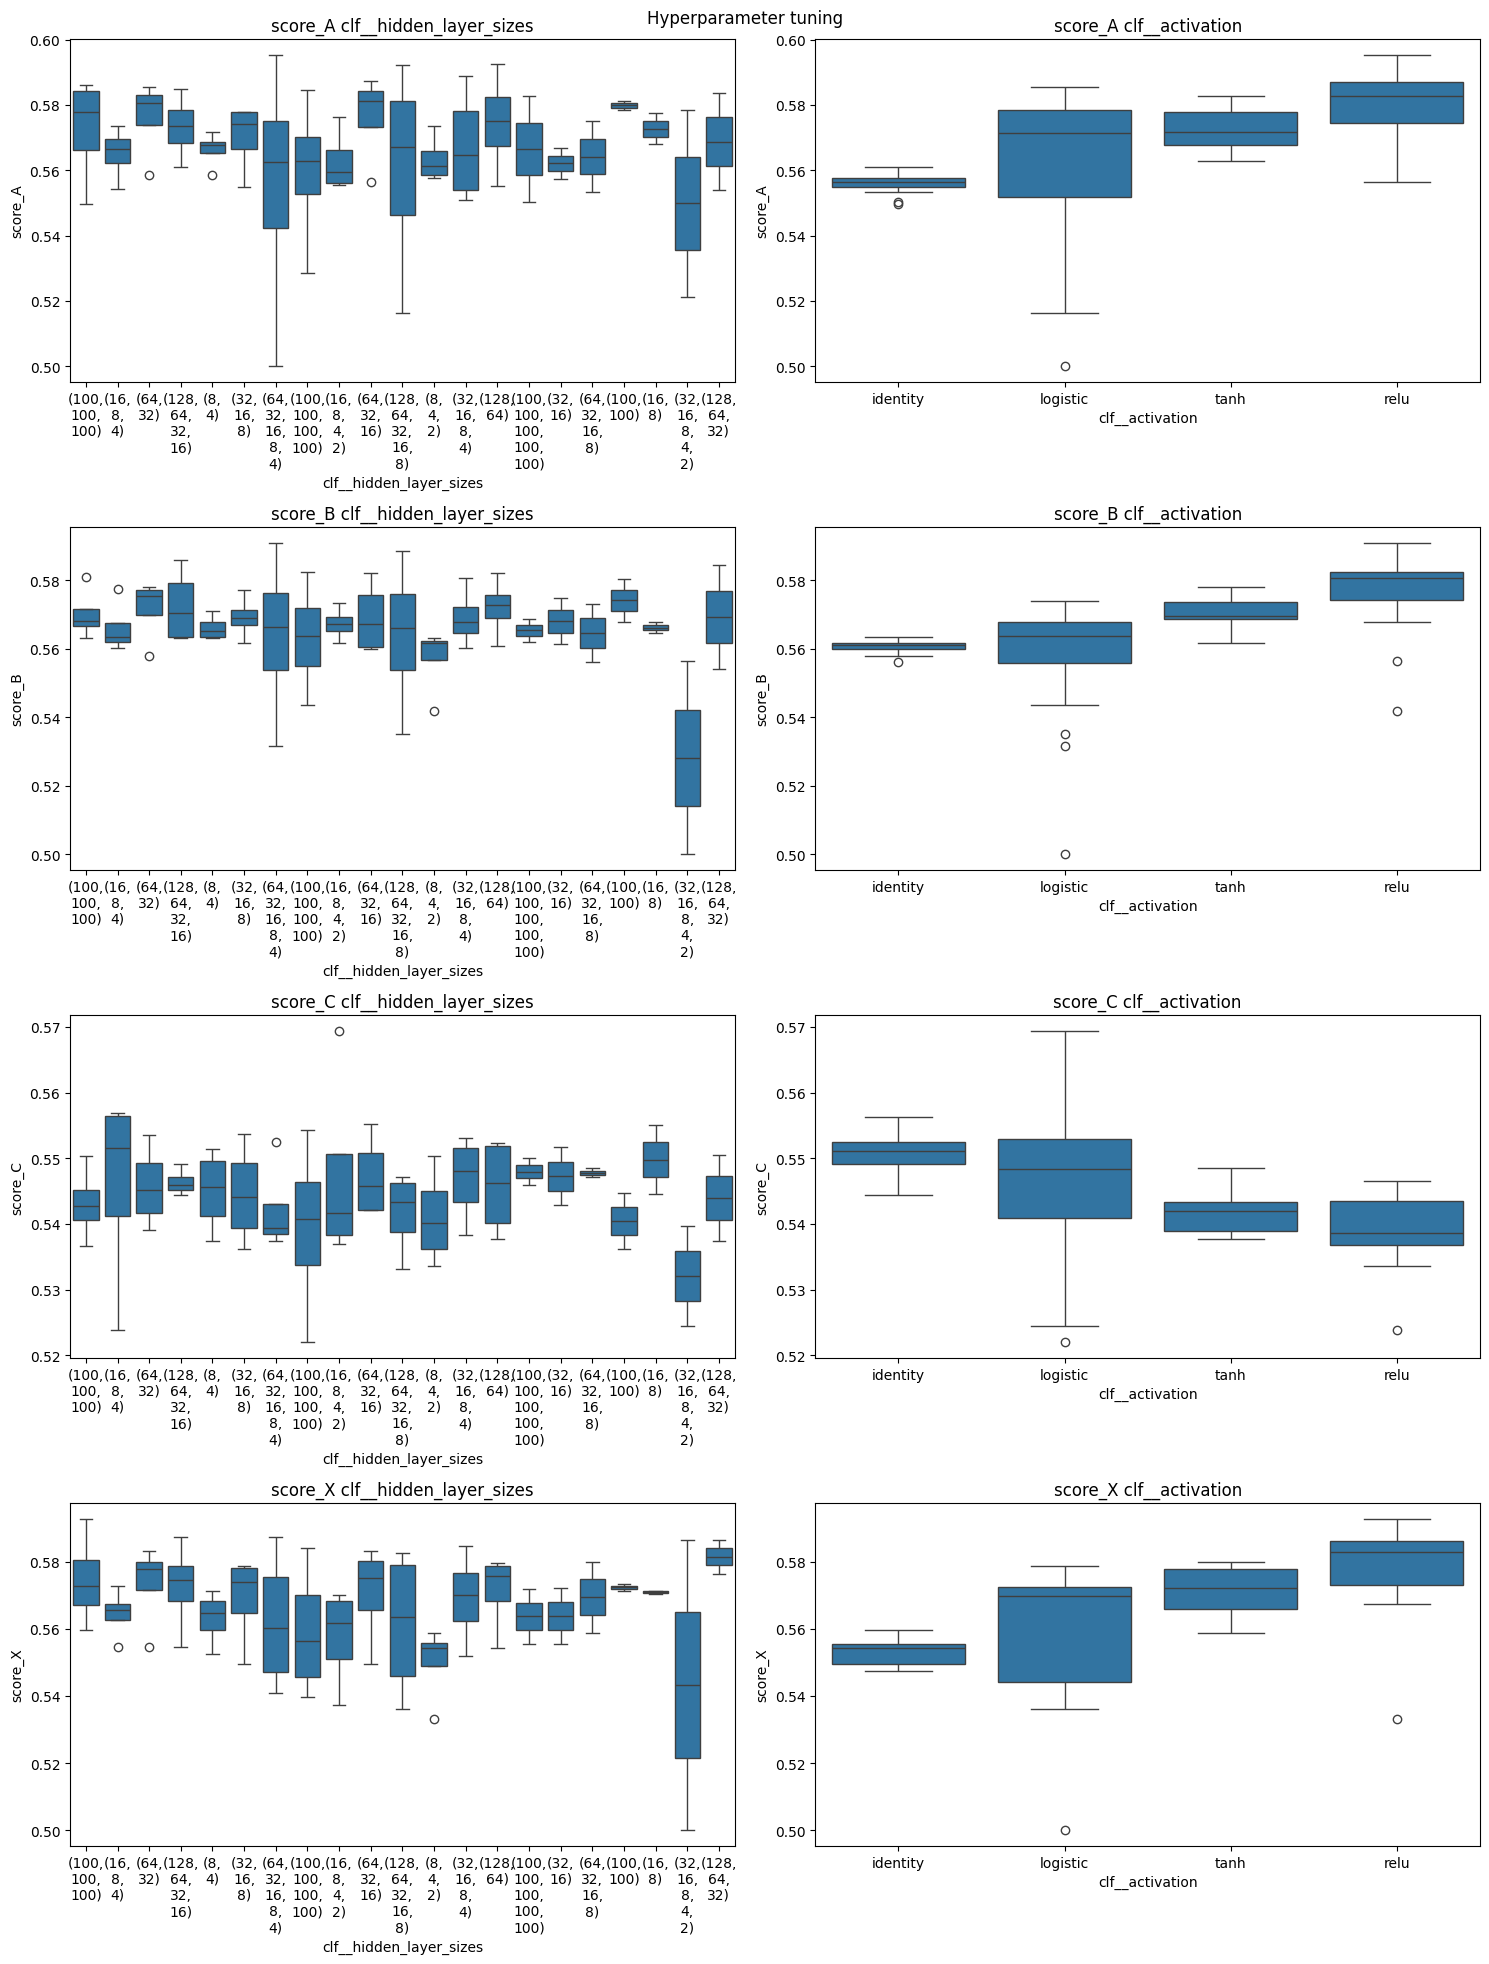

In [40]:
parameters = ['clf__hidden_layer_sizes', 'clf__activation']
boxplot_results(result_df_v1, parameters)

## Grid Search 2: Search learning rate, batch size and C (regularization) for sgd solver

In [ ]:
Version = 'V2'
path = RESULT_PATH + Version + '/'
name_save = NAME_SAVE + '_' + Version
result_df_v2 = gather_results(path, NAME_RESULTS, SAVE_PATH, name_save, verbose=True)
result_df_v2['version'] = Version
rebase_results(result_df_v2)

Gathering 6 files
files: ['./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_1.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_2.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_3.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_4.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_5.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_6.csv']
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_1.csv has shape (50, 36)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V2/RMLP_MVT_INT_search_preproc_V2_node_2.csv has shape (50, 36)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/re

### Preprocessing parameters grid

In [ ]:
print_preproc(result_df_v2)

epochs_tmin: [0]
epochs_length: [2]
epochs_empty_from_mvt_tmin: [-6]
epochs_intention_from_mvt_tmin: [-2]
fmin: [9]
fmax: [30]


### Pipeline parameters grid

In [ ]:
print_pipelines_params(result_df_v2)

pipeline_name: ['cov_ts']
model: ['MLP']
pipeline_step_1: ['cov']
pipeline_step_2: ['ts']
pipeline_step_3: ['no_step']
clf__activation: ['relu']
clf__alpha: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
clf__hidden_layer_sizes: ['(64,\n32,\n16,\n8,\n4)']
clf__learning_rate: ['constant' 'invscaling' 'adaptive']
clf__learning_rate_init: [0.0001 0.001  0.01   0.1   ]
clf__max_iter: [100 200 300 400 500]
clf__solver: ['sgd']


### Max scores

In [ ]:
# display all columns
pd.set_option('display.max_columns', None)
result_df_v2[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v2.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='mean_ABC', ascending=False).head(10)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
152,cov_ts,cov,ts,no_step,MLP,0.581522,0.593816,0.600593,0.550156,0.519735,0.00001,100,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
262,cov_ts,cov,ts,no_step,MLP,0.581221,0.605520,0.593912,0.544232,0.533797,0.00010,300,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
182,cov_ts,cov,ts,no_step,MLP,0.581151,0.593162,0.606176,0.544114,0.499889,0.01000,100,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
179,cov_ts,cov,ts,no_step,MLP,0.581097,0.590564,0.601864,0.550863,0.520507,0.00100,300,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
189,cov_ts,cov,ts,no_step,MLP,0.580794,0.601201,0.588862,0.552321,0.530280,0.01000,300,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
242,cov_ts,cov,ts,no_step,MLP,0.580343,0.593147,0.598452,0.549429,0.521818,0.10000,200,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
139,cov_ts,cov,ts,no_step,MLP,0.579049,0.602453,0.595567,0.539127,0.571286,0.01000,200,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
269,cov_ts,cov,ts,no_step,MLP,0.578700,0.594318,0.596967,0.544815,0.552345,0.00010,500,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
79,cov_ts,cov,ts,no_step,MLP,0.578585,0.595508,0.600513,0.539735,0.567843,0.00100,100,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
299,cov_ts,cov,ts,no_step,MLP,0.577694,0.604876,0.592577,0.535629,0.531489,0.10000,500,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


In [ ]:
result_df_v2[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v2.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_A', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
262,cov_ts,cov,ts,no_step,MLP,0.581221,0.605520,0.593912,0.544232,0.533797,0.0001,300,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
89,cov_ts,cov,ts,no_step,MLP,0.564694,0.605030,0.572163,0.516889,0.564730,0.0100,100,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
299,cov_ts,cov,ts,no_step,MLP,0.577694,0.604876,0.592577,0.535629,0.531489,0.1000,500,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


In [ ]:
result_df_v2[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v2.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
73,cov_ts,cov,ts,no_step,MLP,0.562927,0.555637,0.608394,0.524751,0.528750,0.001,500,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
182,cov_ts,cov,ts,no_step,MLP,0.581151,0.593162,0.606176,0.544114,0.499889,0.010,100,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
179,cov_ts,cov,ts,no_step,MLP,0.581097,0.590564,0.601864,0.550863,0.520507,0.001,300,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


In [ ]:
result_df_v2[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v2.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
73,cov_ts,cov,ts,no_step,MLP,0.562927,0.555637,0.608394,0.524751,0.528750,0.001,500,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
182,cov_ts,cov,ts,no_step,MLP,0.581151,0.593162,0.606176,0.544114,0.499889,0.010,100,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
179,cov_ts,cov,ts,no_step,MLP,0.581097,0.590564,0.601864,0.550863,0.520507,0.001,300,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


### Plots

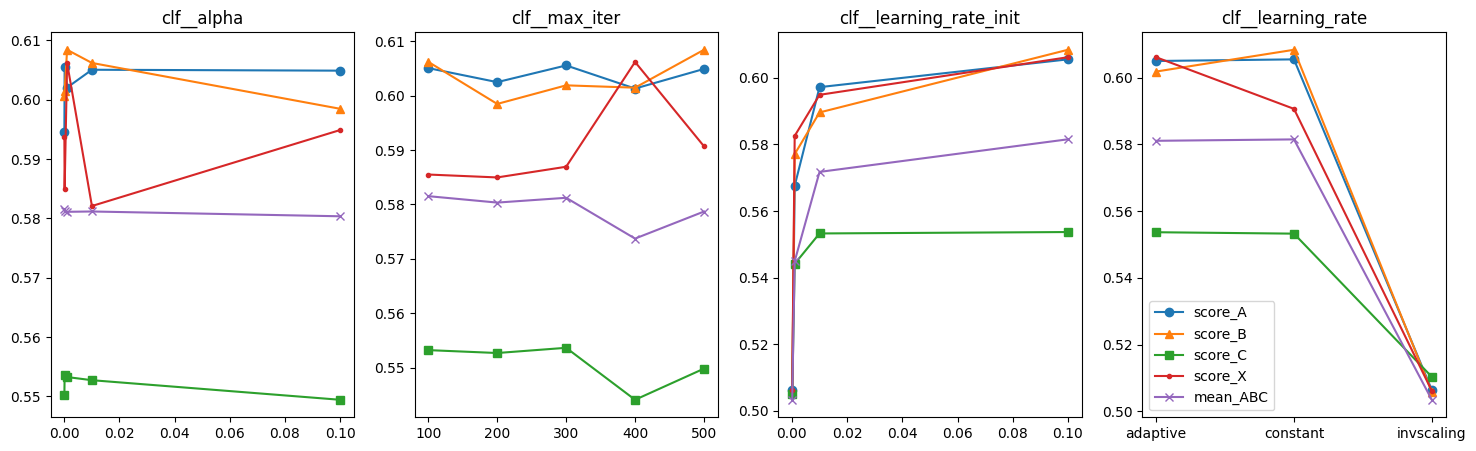

In [ ]:
maxplot_all_results(result_df_v2, ['clf__alpha', 'clf__max_iter', 'clf__learning_rate_init', 'clf__learning_rate'], figsize=(18, 5), mean_ABC=True)

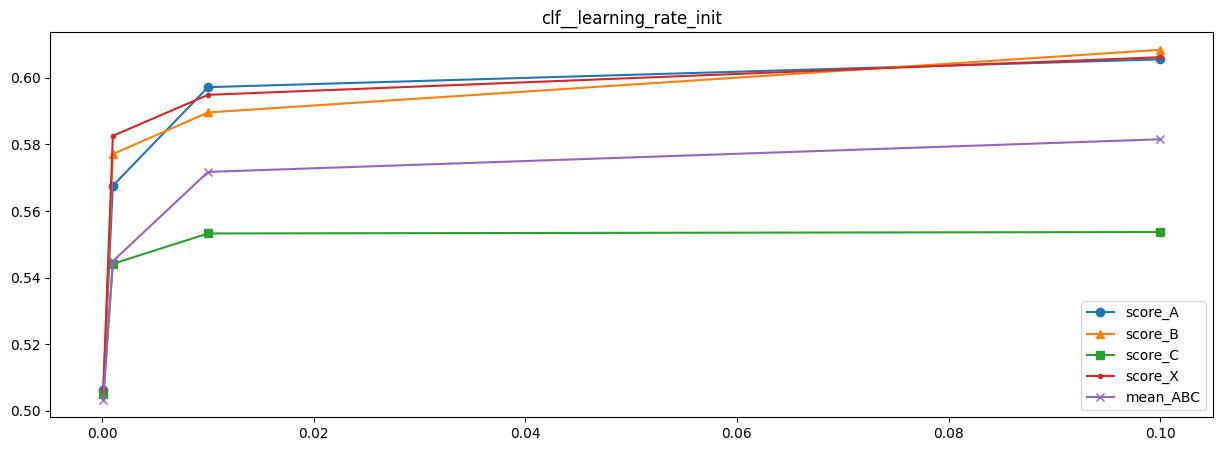

In [ ]:
maxplot_all_results(result_df_v2, ['clf__learning_rate_init'], figsize=(15, 5), mean_ABC=True)

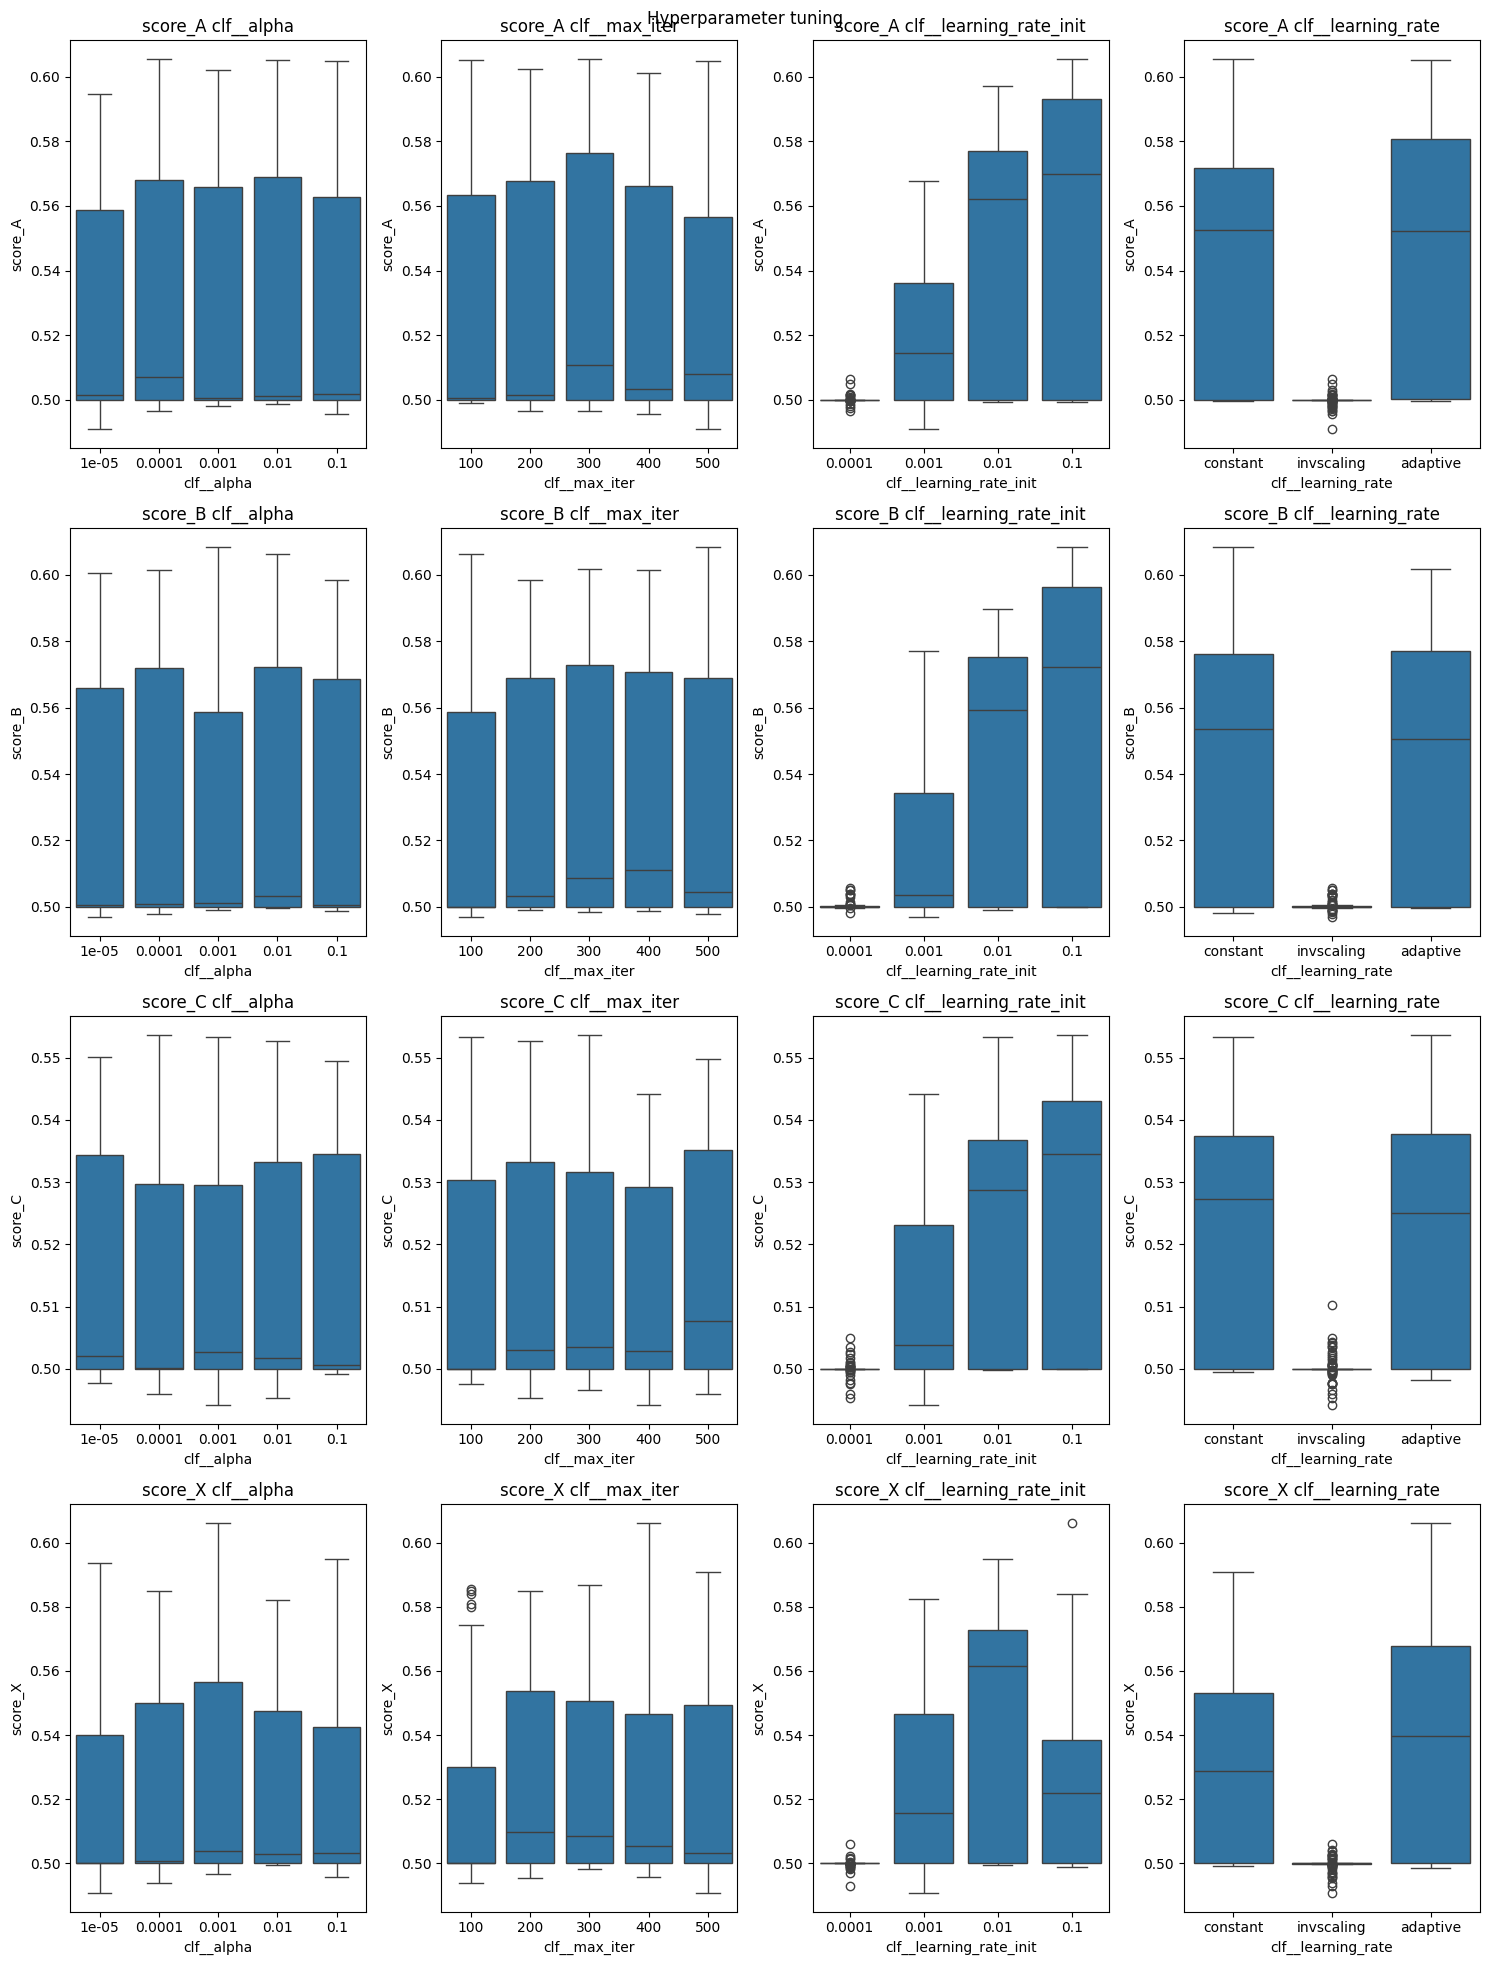

In [ ]:
parameters = ['clf__alpha', 'clf__max_iter', 'clf__learning_rate_init', 'clf__learning_rate']
boxplot_results(result_df_v2, parameters)

In [ ]:
result_df_v2.describe()

,EPOCHS_EMPTY_FROM_MVT_TMIN,EPOCHS_INTENTION_FROM_MVT_TMIN,EPOCHS_LENGTH,EPOCHS_TMIN,FMAX,FMIN,clf__alpha,clf__learning_rate_init,clf__max_iter,score_A,score_B,score_C,score_X,duration_preprocessing,duration_train,memory,NUMBER_OF_SESSIONS,RANDOM_STATE,N_SPLIT,VERSION,mean_ABCX,mean_ABC
count,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.0,300.0,300.000000,300.000000
mean,-6.0,-2.0,2.0,0.0,30.0,9.0,0.022222,0.027775,300.000000,0.530206,0.530221,0.515037,0.523566,456.816901,490.330015,2980.905990,-1.0,42.0,4.0,2.0,0.524757,0.525155
std,0.0,0.0,0.0,0.0,0.0,0.0,0.039134,0.041948,141.657649,0.036623,0.036967,0.018033,0.029633,10.494403,117.981625,122.245176,0.0,0.0,0.0,0.0,0.028241,0.029474
min,-6.0,-2.0,2.0,0.0,30.0,9.0,0.000010,0.000100,100.000000,0.490922,0.496930,0.494175,0.490715,435.701133,309.256152,2914.859375,-1.0,42.0,4.0,2.0,0.495864,0.497581
25%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.000100,0.000775,200.000000,0.500000,0.500000,0.500000,0.500000,454.353500,398.191868,2917.652344,-1.0,42.0,4.0,2.0,0.500000,0.500000
50%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.001000,0.005500,300.000000,0.501469,0.500916,0.501309,0.502311,459.372328,464.684131,2919.166016,-1.0,42.0,4.0,2.0,0.501844,0.501525
75%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.010000,0.032500,400.000000,0.566775,0.568379,0.532551,0.549288,465.970723,569.168463,3104.003906,-1.0,42.0,4.0,2.0,0.556378,0.558829
max,-6.0,-2.0,2.0,0.0,30.0,9.0,0.100000,0.100000,500.000000,0.605520,0.608394,0.553684,0.606156,466.131395,838.748132,3396.074219,-1.0,42.0,4.0,2.0,0.580340,0.581522


## Grid Search 3: Search learning rate, batch size and C (regularization) for adam solver

In [115]:
Version = 'V3'
path = RESULT_PATH + Version + '/'
name_save = NAME_SAVE + '_' + Version
result_df_v3 = gather_results(path, NAME_RESULTS, SAVE_PATH, name_save, verbose=True)
result_df_v3['version'] = Version
rebase_results(result_df_v3)

Gathering 6 files
files: ['./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_1.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_2.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_3.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_4.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_5.csv', './../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_6.csv']
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_1.csv has shape (50, 36)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/results/V3/RMLP_MVT_INT_search_preproc_V3_node_2.csv has shape (50, 36)
File ./../../src/training/RIEMANN_MLP_MVT_INT_grid_search/re

### Preprocessing parameters grid

In [116]:
print_preproc(result_df_v3) 

epochs_tmin: [0]
epochs_length: [2]
epochs_empty_from_mvt_tmin: [-6]
epochs_intention_from_mvt_tmin: [-2]
fmin: [9]
fmax: [30]


### Pipeline parameters grid

In [117]:
print_pipelines_params(result_df_v3)

pipeline_name: ['cov_ts']
model: ['MLP']
pipeline_step_1: ['cov']
pipeline_step_2: ['ts']
pipeline_step_3: ['no_step']
clf__activation: ['relu']
clf__alpha: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
clf__hidden_layer_sizes: ['(64,\n32,\n16,\n8,\n4)']
clf__learning_rate: ['constant' 'invscaling' 'adaptive']
clf__learning_rate_init: [0.0001 0.001  0.01   0.1   ]
clf__max_iter: [100 200 300 400 500]
clf__solver: ['adam']


### Max scores

In [118]:
# display all columns
pd.set_option('display.max_columns', None)
result_df_v3[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v3.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='mean_ABC', ascending=False).head(10)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
231,cov_ts,cov,ts,no_step,MLP,0.582144,0.596069,0.597997,0.552366,0.581428,0.01000,100,0.010,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
142,cov_ts,cov,ts,no_step,MLP,0.579628,0.605008,0.591646,0.542231,0.543844,0.10000,500,0.010,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
188,cov_ts,cov,ts,no_step,MLP,0.577956,0.594067,0.593305,0.546497,0.588856,0.01000,200,0.010,adaptive,adam,"(64,\n32,\n16,\n8,\n4)",relu
251,cov_ts,cov,ts,no_step,MLP,0.577703,0.594463,0.589882,0.548764,0.578050,0.00001,200,0.010,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
128,cov_ts,cov,ts,no_step,MLP,0.577164,0.597092,0.592900,0.541499,0.586710,0.00100,100,0.010,adaptive,adam,"(64,\n32,\n16,\n8,\n4)",relu
284,cov_ts,cov,ts,no_step,MLP,0.576285,0.592816,0.584378,0.551660,0.574092,0.01000,500,0.001,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
125,cov_ts,cov,ts,no_step,MLP,0.575902,0.588231,0.589428,0.550047,0.570152,0.00100,300,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
148,cov_ts,cov,ts,no_step,MLP,0.575324,0.597495,0.589538,0.538940,0.588962,0.10000,100,0.010,adaptive,adam,"(64,\n32,\n16,\n8,\n4)",relu
78,cov_ts,cov,ts,no_step,MLP,0.575083,0.591942,0.583282,0.550027,0.581553,0.00100,500,0.001,adaptive,adam,"(64,\n32,\n16,\n8,\n4)",relu
241,cov_ts,cov,ts,no_step,MLP,0.574830,0.587998,0.594941,0.541551,0.571534,0.10000,100,0.010,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu


In [119]:
result_df_v3[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v3.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_A', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
142,cov_ts,cov,ts,no_step,MLP,0.579628,0.605008,0.591646,0.542231,0.543844,0.10,500,0.010,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
185,cov_ts,cov,ts,no_step,MLP,0.572429,0.599886,0.569038,0.548363,0.580859,0.01,400,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
94,cov_ts,cov,ts,no_step,MLP,0.571350,0.598092,0.585666,0.530293,0.593678,0.10,100,0.001,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu


In [120]:
result_df_v3[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v3.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
145,cov_ts,cov,ts,no_step,MLP,0.571042,0.585521,0.599929,0.527678,0.560800,0.10,300,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
35,cov_ts,cov,ts,no_step,MLP,0.564816,0.566866,0.599358,0.528223,0.567178,0.01,100,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
194,cov_ts,cov,ts,no_step,MLP,0.573711,0.573223,0.599045,0.548867,0.588871,0.10,300,0.001,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu


In [121]:
result_df_v3[['pipeline_name', 'pipeline_step_1', 'pipeline_step_2', 'pipeline_step_3', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v3.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,pipeline_step_1,pipeline_step_2,pipeline_step_3,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
145,cov_ts,cov,ts,no_step,MLP,0.571042,0.585521,0.599929,0.527678,0.560800,0.10,300,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
35,cov_ts,cov,ts,no_step,MLP,0.564816,0.566866,0.599358,0.528223,0.567178,0.01,100,0.010,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
194,cov_ts,cov,ts,no_step,MLP,0.573711,0.573223,0.599045,0.548867,0.588871,0.10,300,0.001,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu


### Plots

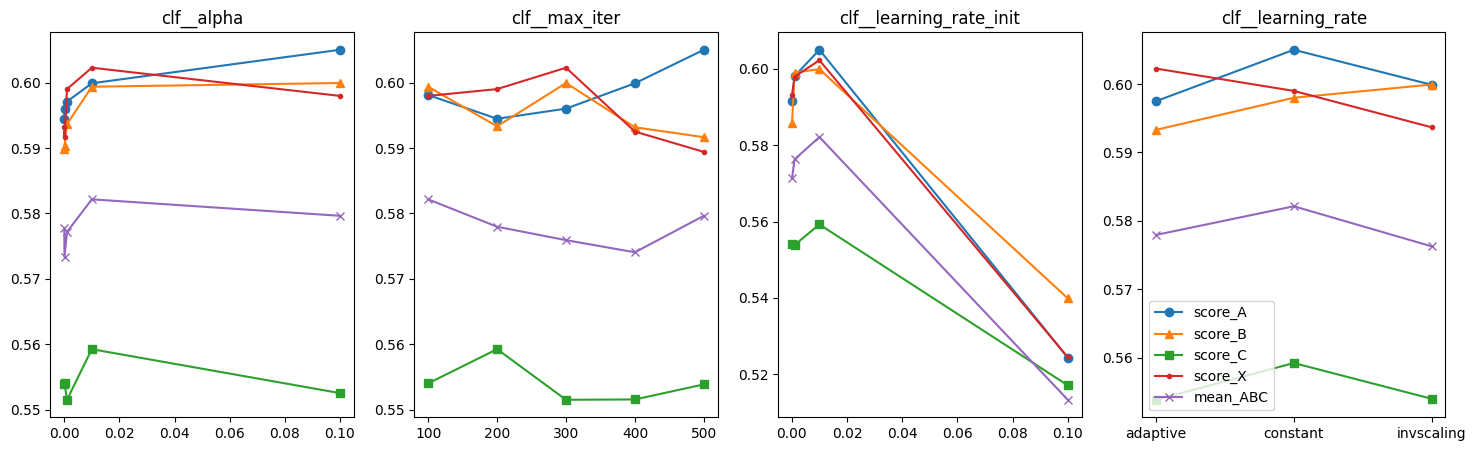

In [122]:
maxplot_all_results(result_df_v3, ['clf__alpha', 'clf__max_iter', 'clf__learning_rate_init', 'clf__learning_rate'], figsize=(18, 5), mean_ABC=True)

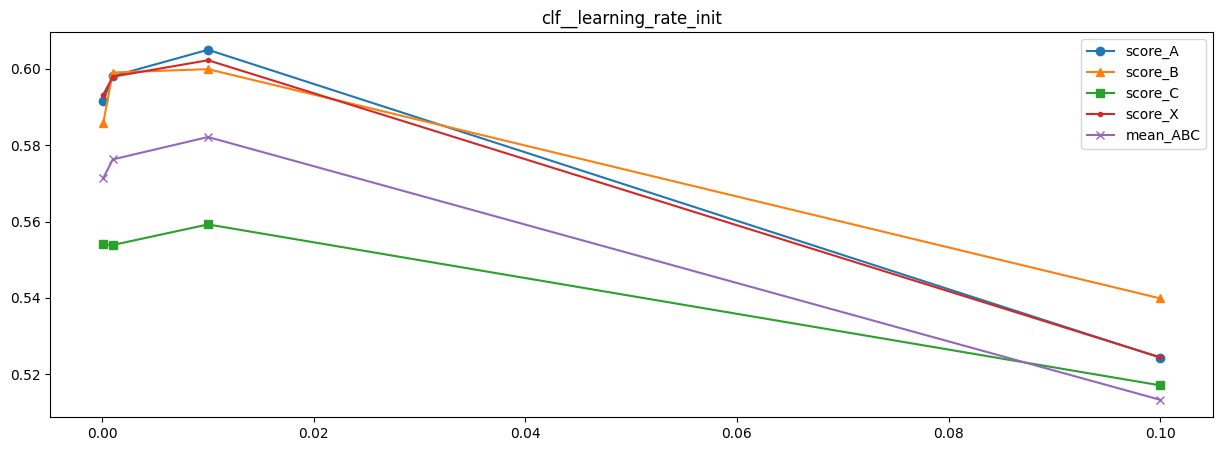

In [123]:
maxplot_all_results(result_df_v3, ['clf__learning_rate_init'], figsize=(15, 5), mean_ABC=True)

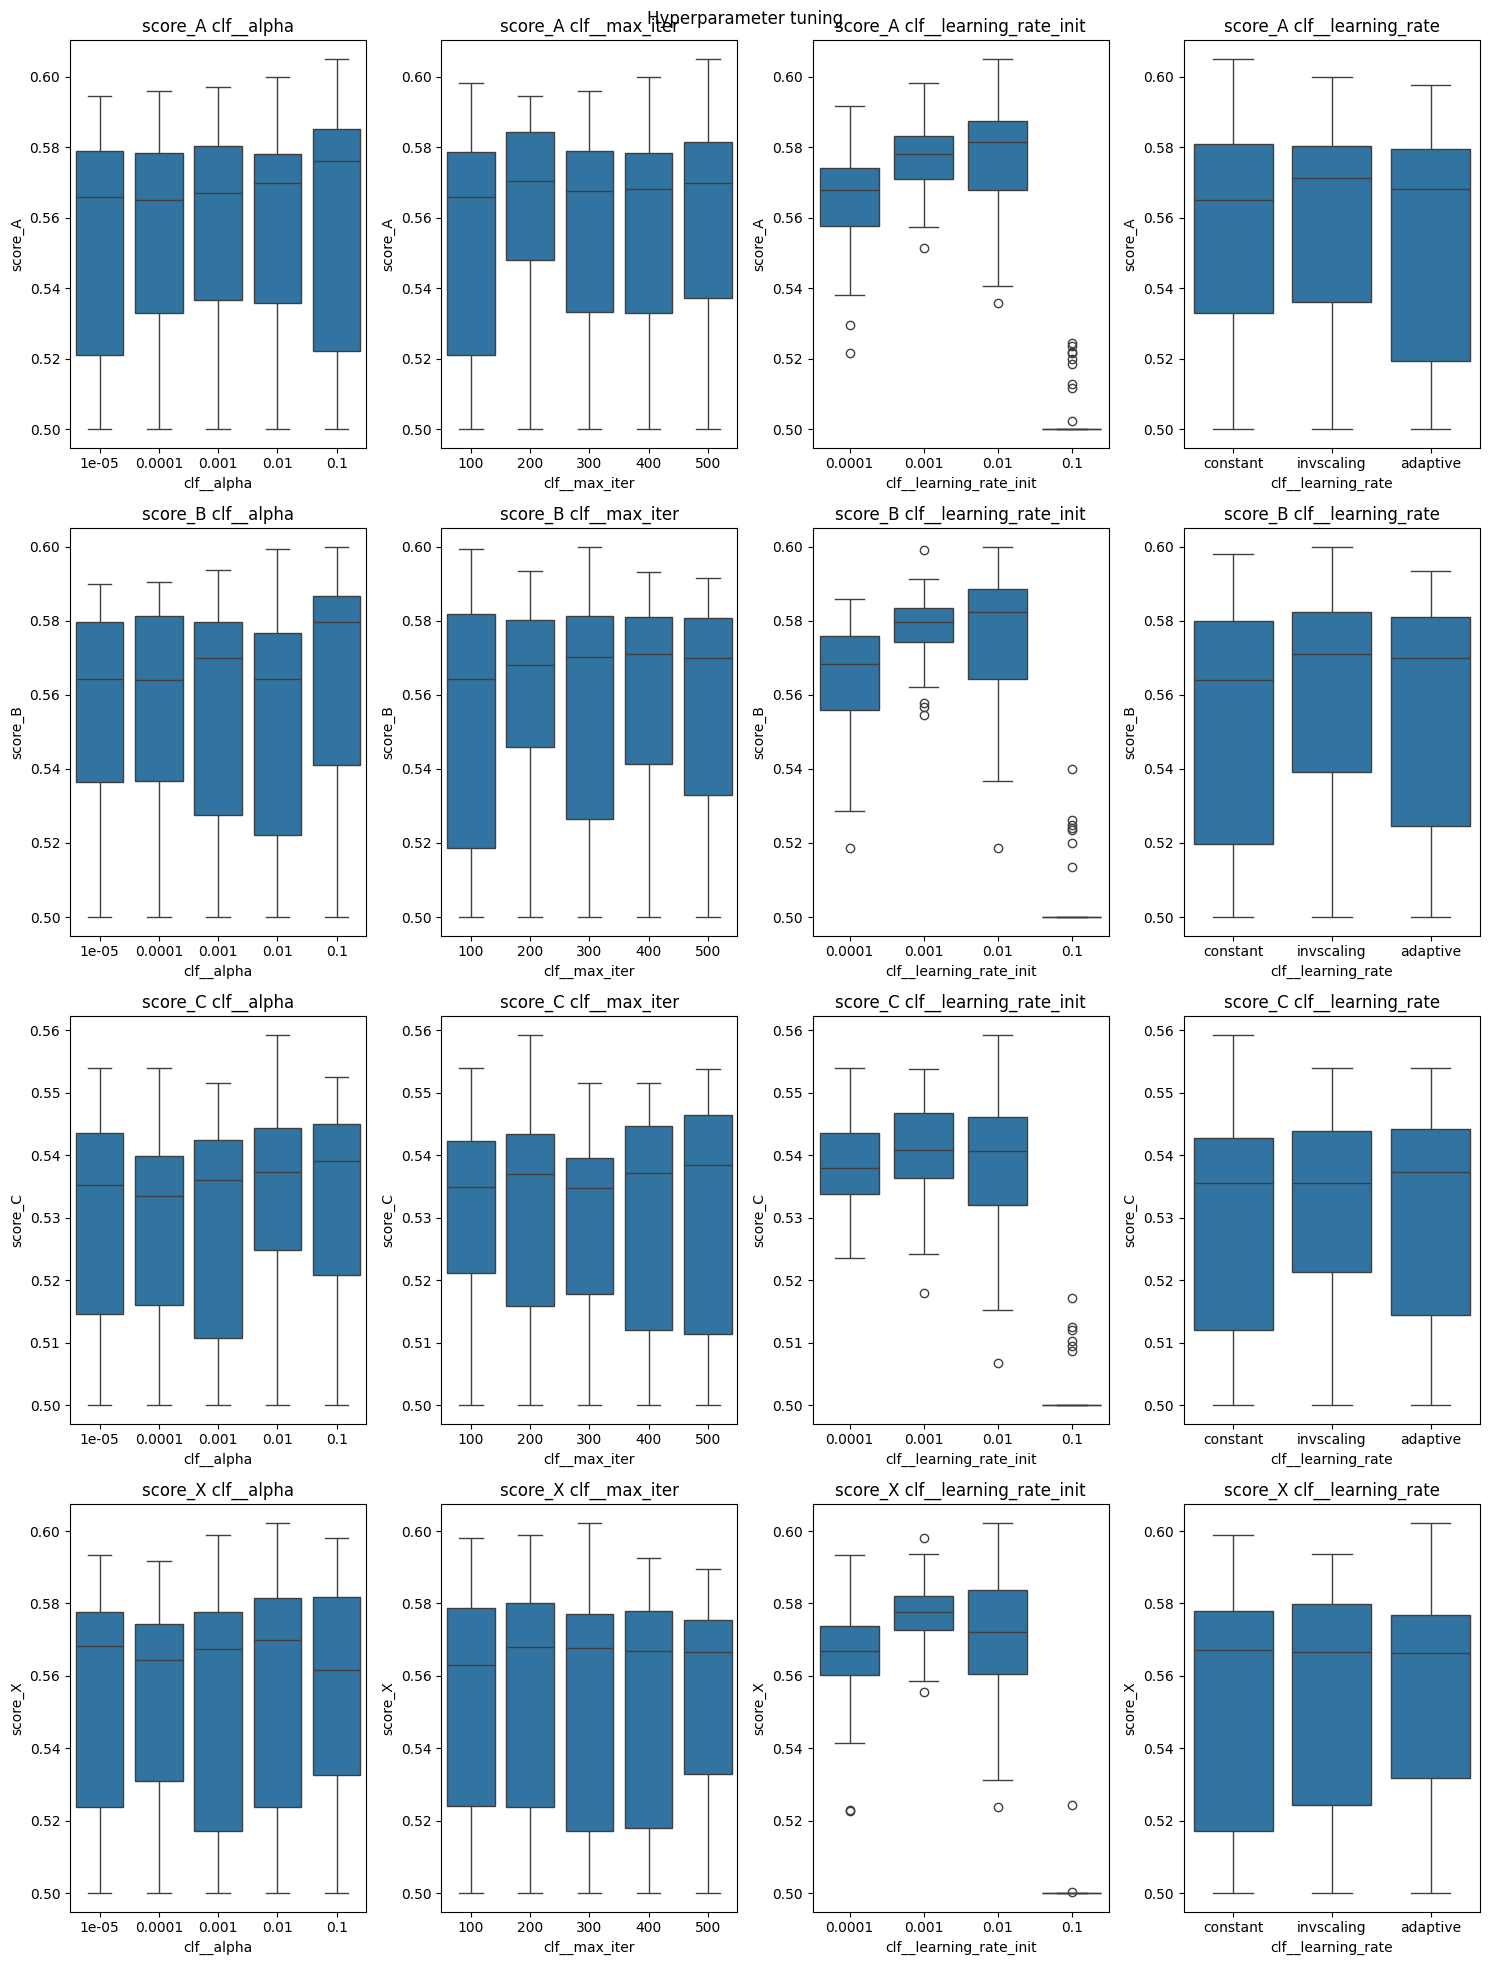

In [124]:
parameters = ['clf__alpha', 'clf__max_iter', 'clf__learning_rate_init', 'clf__learning_rate']
boxplot_results(result_df_v3, parameters)

In [125]:
result_df_v3.describe()

,EPOCHS_EMPTY_FROM_MVT_TMIN,EPOCHS_INTENTION_FROM_MVT_TMIN,EPOCHS_LENGTH,EPOCHS_TMIN,FMAX,FMIN,clf__alpha,clf__learning_rate_init,clf__max_iter,score_A,score_B,score_C,score_X,duration_preprocessing,duration_train,memory,NUMBER_OF_SESSIONS,RANDOM_STATE,N_SPLIT,VERSION,mean_ABCX,mean_ABC
count,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.0,300.0,300.000000,300.000000
mean,-6.0,-2.0,2.0,0.0,30.0,9.0,0.022222,0.027775,300.000000,0.555514,0.555101,0.529685,0.553432,461.057842,522.846702,2987.002969,-1.0,42.0,4.0,3.0,0.548433,0.546767
std,0.0,0.0,0.0,0.0,0.0,0.0,0.039134,0.041948,141.657649,0.033297,0.033381,0.018114,0.032981,18.805546,151.958352,143.434305,0.0,0.0,0.0,0.0,0.028030,0.027035
min,-6.0,-2.0,2.0,0.0,30.0,9.0,0.000010,0.000100,100.000000,0.500000,0.500000,0.500000,0.500000,439.898959,350.645260,2915.667969,-1.0,42.0,4.0,3.0,0.500000,0.500000
25%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.000100,0.000775,200.000000,0.524141,0.525755,0.514536,0.522886,444.188553,429.509325,2917.729492,-1.0,42.0,4.0,3.0,0.531837,0.532184
50%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.001000,0.005500,300.000000,0.568257,0.568786,0.535793,0.566764,458.202255,467.947357,2918.376953,-1.0,42.0,4.0,3.0,0.561078,0.558714
75%,-6.0,-2.0,2.0,0.0,30.0,9.0,0.010000,0.032500,400.000000,0.580757,0.581035,0.543927,0.578141,468.622810,533.001596,2920.873047,-1.0,42.0,4.0,3.0,0.567919,0.565728
max,-6.0,-2.0,2.0,0.0,30.0,9.0,0.100000,0.100000,500.000000,0.605008,0.599929,0.559238,0.602263,497.232218,1153.579954,3398.015625,-1.0,42.0,4.0,3.0,0.581965,0.582144


### Concatenation of the results V2, V3

In [126]:
result_df_v23 = pd.concat([result_df_v2, result_df_v3], ignore_index=True)
# max results
result_df_v23[['pipeline_name', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v23.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='mean_ABC', ascending=False).head(10)

,pipeline_name,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
531,cov_ts,MLP,0.582144,0.596069,0.597997,0.552366,0.581428,0.01000,100,0.01,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
152,cov_ts,MLP,0.581522,0.593816,0.600593,0.550156,0.519735,0.00001,100,0.10,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
262,cov_ts,MLP,0.581221,0.605520,0.593912,0.544232,0.533797,0.00010,300,0.10,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
182,cov_ts,MLP,0.581151,0.593162,0.606176,0.544114,0.499889,0.01000,100,0.10,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
179,cov_ts,MLP,0.581097,0.590564,0.601864,0.550863,0.520507,0.00100,300,0.10,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
189,cov_ts,MLP,0.580794,0.601201,0.588862,0.552321,0.530280,0.01000,300,0.10,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
242,cov_ts,MLP,0.580343,0.593147,0.598452,0.549429,0.521818,0.10000,200,0.10,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
442,cov_ts,MLP,0.579628,0.605008,0.591646,0.542231,0.543844,0.10000,500,0.01,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
139,cov_ts,MLP,0.579049,0.602453,0.595567,0.539127,0.571286,0.01000,200,0.10,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
269,cov_ts,MLP,0.578700,0.594318,0.596967,0.544815,0.552345,0.00010,500,0.10,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


In [127]:
result_df_v23[['pipeline_name', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v23.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_A', ascending=False).head(3)

,pipeline_name,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
262,cov_ts,MLP,0.581221,0.605520,0.593912,0.544232,0.533797,0.0001,300,0.10,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
89,cov_ts,MLP,0.564694,0.605030,0.572163,0.516889,0.564730,0.0100,100,0.10,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu
442,cov_ts,MLP,0.579628,0.605008,0.591646,0.542231,0.543844,0.1000,500,0.01,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu


In [128]:
result_df_v23[['pipeline_name', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v23.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_B', ascending=False).head(3)

,pipeline_name,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
73,cov_ts,MLP,0.562927,0.555637,0.608394,0.524751,0.528750,0.001,500,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
182,cov_ts,MLP,0.581151,0.593162,0.606176,0.544114,0.499889,0.010,100,0.1,constant,sgd,"(64,\n32,\n16,\n8,\n4)",relu
179,cov_ts,MLP,0.581097,0.590564,0.601864,0.550863,0.520507,0.001,300,0.1,adaptive,sgd,"(64,\n32,\n16,\n8,\n4)",relu


In [129]:
result_df_v23[['pipeline_name', 'model', 'mean_ABC', 'score_A', 'score_B', 'score_C', 'score_X', ] + [name for name in result_df_v23.apply(lambda x: x.nunique()).sort_values(ascending=False).index.tolist() if 'clf__' in name]].sort_values(by='score_C', ascending=False).head(3)

,pipeline_name,model,mean_ABC,score_A,score_B,score_C,score_X,clf__alpha,clf__max_iter,clf__learning_rate_init,clf__learning_rate,clf__solver,clf__hidden_layer_sizes,clf__activation
581,cov_ts,MLP,0.571367,0.583141,0.571722,0.559238,0.583007,0.01000,200,0.0100,constant,adam,"(64,\n32,\n16,\n8,\n4)",relu
413,cov_ts,MLP,0.557437,0.545197,0.573102,0.554012,0.560508,0.00010,100,0.0001,invscaling,adam,"(64,\n32,\n16,\n8,\n4)",relu
506,cov_ts,MLP,0.538483,0.521612,0.539968,0.553868,0.551272,0.00001,100,0.0001,adaptive,adam,"(64,\n32,\n16,\n8,\n4)",relu
